# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "E:/AV/DataSetExploration/drone-dataset-tools/data/location-2/home"
dataDir = "D:/AV/DataSetExploration/drone-dataset-tools/data/location-2/lab"

In [2]:
exec(open('init_notebook.py').read())
%load_ext autoreload
%autoreload 2


current working dirD:\AV\DataSetExploration\drone-dataset-tools\src


In [26]:
import logging
logging.basicConfig(level=logging.INFO)
from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")
import seaborn as sns

from extractors.loader import Loader
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(None)


In [27]:
from extractors.LocationData import LocationData
sceneData = LocationData.load(dataDir, "2022-12-07-fps-5-scene-21.dll")
pedDf = sceneData.getPedDataInSceneCoordinates()
otherDf = sceneData.getOtherDataInSceneCoordinates()
sceneMeta = sceneData.getMeta()

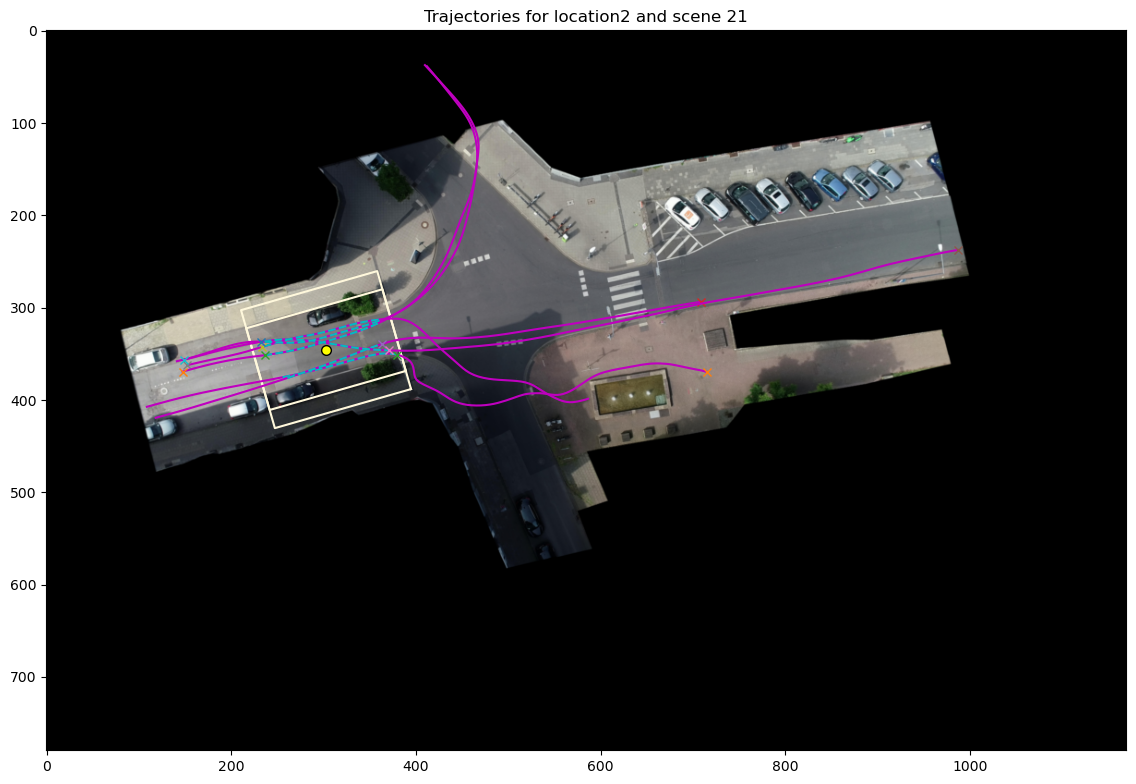

In [28]:
visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=True, ids=[21426, 21549, 28230, 29106, 29238, 29240])

In [29]:
pedDf[['xVelocity', 'yVelocity']].describe()

,xVelocity,yVelocity
count,1437.0,1437.0
mean,-0.107161,-0.025021
std,1.155965,1.1232
min,-3.30718,-1.89207
25%,-0.53814,-1.14966
50%,-0.15479,-0.12748
75%,0.36842,1.11961
max,5.64998,2.13665


<AxesSubplot:>

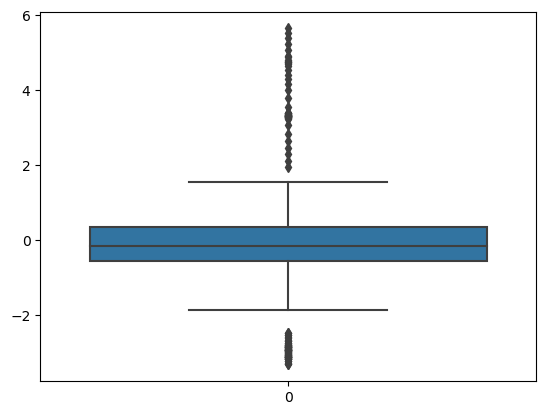

In [30]:
sns.boxplot(pedDf['xVelocity'])

In [31]:

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper
visualizer = TrajectoryVisualizer()
# colMapper = ColMapper(
#         idCol='uniqueTrackId', 
#         xCol='sceneX', 
#         yCol='sceneY',
#         xVelCol='xVelocity', 
#         yVelCol='xVelocity', 
#         speedCol='speed'
#     )
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='xCenter', 
        yCol='yCenter',
        xVelCol='xVelocity', 
        yVelCol='xVelocity', 
        speedCol='speed'
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0,
    maxSpeed = 3.0,
    minYDisplacement = 5.0,
    maxXDisplacement = 8.0,
)

In [32]:
transformer.deriveSpeed(sceneData.pedData)
transformer.deriveDisplacements(sceneData.pedData)
sceneData.pedData.describe()

,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,roadWidth,speed,displacementX,displacementY
count,12638.000000,12638.0,12638.0,12638.0,12638.0,12638.0,12638.0,12638.0,12638.0,12638.0,12638.0,12638.0,12638.0,12638.0,12638.0,12638.0,12638.000000,12638.000000,12638.000000
mean,160140.356702,24.221712,302.017487,16943.950783,511.380361,35.130037,-30.280102,176.440974,0.0,0.0,-0.000263,-0.108361,-0.031555,0.003871,24523.729783,9.0,1.361544,22.678929,15.133862
std,91349.471974,3.507854,154.178488,9021.707546,353.234055,12.723382,9.870169,103.711867,0.0,0.0,1.228233,0.927951,0.238331,0.22467,3546.752579,0.0,1.078502,12.709771,9.772698
min,9165.000000,18.0,16.0,0.0,0.0,8.8374,-54.7003,0.03257,0.0,0.0,-5.36037,-3.33113,-1.55046,-2.20649,18074.0,9.0,0.000071,0.000000,0.000000
25%,71598.250000,21.0,207.0,10341.25,225.0,26.732642,-37.941463,101.34751,0.0,0.0,-0.90204,-0.89267,-0.12656,-0.087698,21426.0,9.0,0.592046,14.273902,7.424505
50%,171294.500000,25.0,294.0,16810.0,465.0,34.02745,-31.645075,191.438235,0.0,0.0,-0.009305,-0.120815,-0.01936,0.00213,25300.0,9.0,1.295625,21.568710,13.705505
75%,233302.750000,27.0,423.0,24711.5,738.75,39.328492,-24.20538,272.786405,0.0,0.0,0.94117,0.573392,0.070667,0.095715,27530.0,9.0,1.879317,26.869753,21.145200
max,289872.000000,29.0,587.0,32142.0,2040.0,96.45507,-3.6403,359.98532,0.0,0.0,5.9119,2.25958,1.46216,1.18999,29587.0,9.0,8.360689,83.996330,41.710280


<AxesSubplot:>

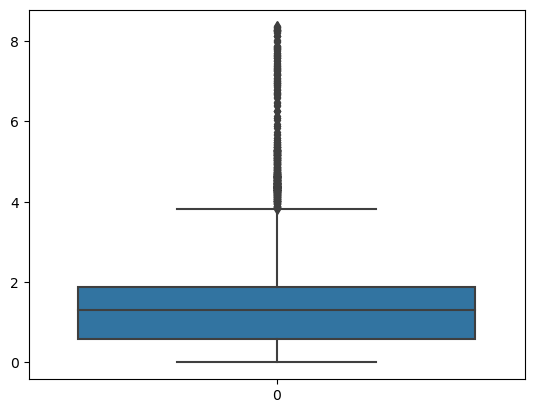

In [33]:
sns.boxplot(sceneData.pedData['speed'])

In [34]:
outliers = cleaner.getOutliersBySpeed(sceneData.pedData, byIQR=True, returnVals=True)
outliers

IQR value for column speed is: 0.6294381723410165
using range (0.9490928638442089, 3.466845553208275)


,speed
uniqueTrackId,
18379,5.582551
21252,7.580708
21426,8.360689
21549,8.288960
27560,5.548158
28230,4.803193
29106,4.845364
29238,4.677059
29240,4.480596


In [35]:
outliers = cleaner.getOutliersBySpeed(sceneData.pedData, byIQR=False, returnVals=True)
print(outliers)

using range (0.0, 3.0)
                  speed
uniqueTrackId          
18379          5.582551
21034          3.044194
21252          7.580708
21426          8.360689
21549          8.288960
27560          5.548158
28230          4.803193
29106          4.845364
29238          4.677059
29240          4.480596


In [36]:
print(sceneData.uniquePedIds())
print(sceneData.uniqueOtherIds())

<IntegerArray>
[18074, 18116, 18339, 18356, 18365, 18379, 19072, 19081, 19094, 19343, 20283,
 20287, 20325, 20377, 21034, 21112, 21252, 21306, 21358, 21359, 21426, 21549,
 22016, 22066, 22101, 22226, 22250, 22313, 22531, 22540, 23237, 23395, 23423,
 23437, 24211, 24253, 25117, 25288, 25300, 25445, 25472, 26085, 26161, 26223,
 26231, 26285, 26451, 26475, 27258, 27294, 27346, 27374, 27530, 27552, 27560,
 28123, 28206, 28230, 28242, 28469, 29104, 29106, 29207, 29238, 29240, 29303,
 29529, 29580, 29586, 29587]
Length: 70, dtype: Int64
<IntegerArray>
[18022, 18024, 18025, 18033, 18036, 18039, 18046, 18056, 18058, 18062,
 ...
 29510, 29514, 29521, 29522, 29526, 29537, 29563, 29565, 29571, 29583]
Length: 2287, dtype: Int64


In [37]:
# sceneData.moveOutlierPedsToOthers(transformer, cleaner, force=True)
sceneData.buildLocalInformation(transformer, cleaner, force=True)
print(sceneData.uniquePedIds())
print(sceneData.uniqueOtherIds())

INFO:root:SceneData 21: moving outlier peds to others. We should only find outliers in the clipped trajectories?
INFO:root:Scene 21: clipping original data


using range (0.0, 3.0)


clipping ped trajectories for scene # 21 with width offset 4.0:   0%|                           | 0/60 [00:00<?, ?it/s]WARNING:root:pedestrian 18339: Disregarding as the length 26.19637506410154 is too long)
clipping ped trajectories for scene # 21 with width offset 4.0:  58%|██████████▌       | 35/60 [00:00<00:00, 41.41it/s]WARNING:root:pedestrian 26161: Disregarding as the length 26.077216734657902 is too long)
clipping ped trajectories for scene # 21 with width offset 4.0:  75%|█████████████▌    | 45/60 [00:01<00:00, 39.05it/s]WARNING:root:pedestrian 27374: Disregarding as the length 26.029322220537527 is too long)
clipping ped trajectories for scene # 21 with width offset 4.0: 100%|██████████████████| 60/60 [00:01<00:00, 40.99it/s]
clipping other trajectories for scene # 21: 100%|██████████████████████████████████| 2297/2297 [01:32<00:00, 24.77it/s]
INFO:root:Scene 21: transforming trajectories to scene coordinates
INFO:root:Already transformed
INFO:root:Scene 21: adding dynamics


KeyError: 'sceneX'

In [ ]:
sceneData.warnings